In [26]:
#2017168192, Divan du Toit
#CSIA6813
#Assignment 4
#PRINCIPAL COMPONENT ANALYSIS
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

In [23]:
#Read 
Survey = pd.read_csv('staff_survey.csv')
Survey.head()

,current_satisfaction_level,previous_satisfaction_level,number_of_projects,average_montly_hours,time_spend_at_company,work_accident,left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [92]:
print('Shape:')
print(Survey.shape)
print('Describe:')
print(Survey.columns)

Shape:
(14999, 10)
Describe:
Index(['current_satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_montly_hours', 'time_spend_at_company',
       'work_accident', 'left_company', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')


In [95]:
print('Correlation:')
print(Survey[Survey.columns[:]].corr()['left_company'][:])

Correlation:
current_satisfaction_level    -0.388375
previous_satisfaction_level    0.006567
number_of_projects             0.023787
average_montly_hours           0.071287
time_spend_at_company          0.144822
work_accident                 -0.154622
left_company                   1.000000
promotion_last_5years         -0.061788
Name: left_company, dtype: float64


In [6]:
Survey.columns

Index(['current_satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_montly_hours', 'time_spend_at_company',
       'work_accident', 'left_company', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')

In [24]:
features = ['current_satisfaction_level', 'previous_satisfaction_level',
       'number_of_projects', 'average_montly_hours', 'time_spend_at_company',
       'work_accident', 'promotion_last_5years']

survey_x = Survey[features]
survey_y = Survey['left_company']
survey_y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left_company, Length: 14999, dtype: int64

In [97]:
#normalize: mean=0, std=1
#survey_x = survey_x - survey_x.mean()

#survey_z = survey_x / survey_x.std()
survey_z = StandardScaler().fit_transform(survey_x)


In [98]:
#Sanity Check
print('Mean:')
print(survey_z.mean())
print('---'*15)
print('Std:')
print(survey_z.std())

Mean:
4.33121589902626e-18
---------------------------------------------
Std:
1.0


In [99]:
#Covariance
#survey_covZ = np.dot(survey_z.T,survey_z)
survey_covZ = np.cov(survey_z.T)
survey_covZ

array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

In [100]:
#Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(survey_covZ)
eigenvalues[::-1].sort()
eigenvectors[::-1].sort()




In [101]:
survey_d = np.diag(eigenvalues)
survey_p = eigenvectors

In [102]:
#Get Z*
survey_zNew = np.dot(survey_covZ,survey_p)
survey_zNew

array([[-0.27875036, -0.08699407, -0.07258855,  0.27896681,  0.27819873,
         0.35321718,  0.7218398 ],
       [-1.12385152, -0.24392323,  0.03224887,  0.1535851 ,  0.52675755,
         0.60033592,  1.10259103],
       [-1.13767108, -0.26664842, -0.05874343, -0.03579983,  0.29752474,
         0.36921311,  1.05518659],
       [-0.83743701, -0.22731862, -0.01949087,  0.10857202,  0.58731881,
         0.7010688 ,  1.12616096],
       [-0.56119399, -0.02369623,  0.05000005,  0.10304681,  0.38753397,
         0.53900429,  1.02128368],
       [-0.82683082, -0.06202269, -0.04105971, -0.00427597,  0.05871448,
         0.40753148,  0.51794605],
       [-0.44060277, -0.04794467,  0.00382963,  0.02360108,  0.13140394,
         0.55315835,  0.83955879]])

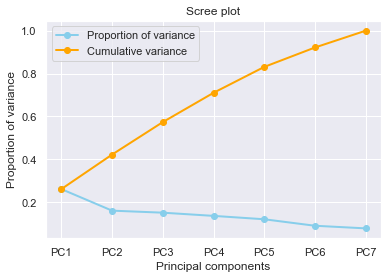

In [103]:
#Scree plot
#help from https://towardsdatascience.com/principal-component-analysis-from-scratch-in-numpy-61843da1f967
#1. Calculate the proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]


# Plot scree plot from PCA
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

In [104]:
prop_var

[0.2614360420171323,
 0.16093156465426486,
 0.15147009525908098,
 0.13656039104655898,
 0.1207750420731644,
 0.09051337561072029,
 0.07831348933907817]

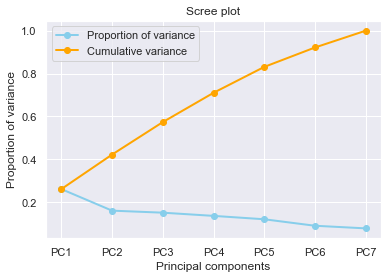

In [127]:
#PCA using sklearn
#help from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

principalComponents = pca.fit_transform(survey_z)
principalDF = pd.DataFrame(data = principalComponents,
                          columns = [features])

skprop_var = pca.explained_variance_ratio_
#2. Calculate the cumulative variance
skcum_var = [np.sum(skprop_var[:i+1]) for i in range(len(skprop_var))]


# Plot scree plot from PCA

x_labels = ['PC{}'.format(i+1) for i in range(len(skprop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

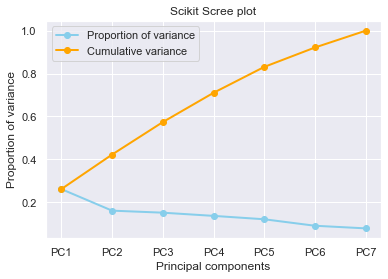

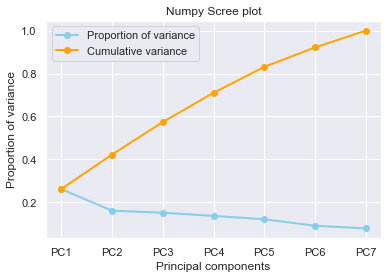

Graphs are identical


In [128]:
#compare numpy and scikit

x_labels = ['PC{}'.format(i+1) for i in range(len(skprop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scikit Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Numpy Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

print('Graphs are identical')

In [131]:
#as further proof, identical explained variance ratio arrays
print('Numpy explained variance ratio')
print(prop_var)
print('Scikit explained variance ratio')
print(skprop_var)
print('Notice identical values')

Numpy explained variance ratio
[0.2614360420171323, 0.16093156465426486, 0.15147009525908098, 0.13656039104655898, 0.1207750420731644, 0.09051337561072029, 0.07831348933907817]
Scikit explained variance ratio
[0.26143604 0.16093156 0.1514701  0.13656039 0.12077504 0.09051338
 0.07831349]
Notice identical values


In [132]:
#Reduce to 2 components
pca = PCA(n_components=2)

principalReducedComponents = pca.fit_transform(survey_z)
principalReducedDF = pd.DataFrame(data = principalReducedComponents,
                          columns = ['Principal Component 1', 'Principal Component 2'])

In [133]:
#Final dataframe for plotting
finalDf = pd.concat([principalReducedDF, survey_y], axis = 1)
finalDf

,Principal Component 1,Principal Component 2,left_company
0,-1.900350,-1.120831,1
1,2.135832,0.249337,1
2,3.058916,-1.683127,1
3,1.550277,0.125511,1
4,-1.904444,-1.168134,1
...,...,...,...
14994,-1.854913,-0.991615,1
14995,-2.011924,-1.243596,1
14996,-2.050716,-1.182032,1
14997,2.914185,-1.427526,1


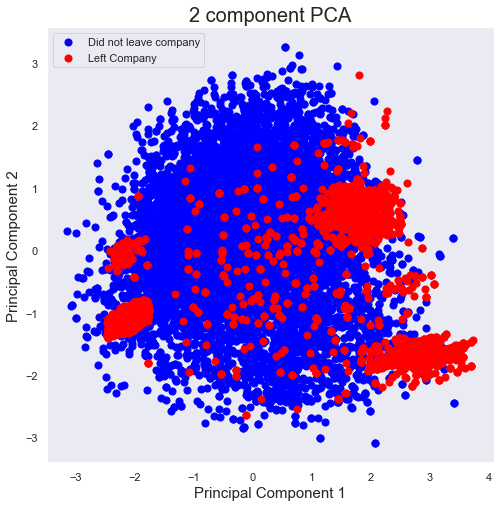

In [134]:
#plot inspiration from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['blue', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['left_company'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(['Did not leave company', 'Left Company'])
ax.grid()